# Neuroal Network Overfitting

## Task F
- Train a neural net and overﬁt it to cifar. 
- Don't use any regularization. 
- Don't use my crappy implementation, but use keras. Use the train and test splits in the data do evaluate the model.


### Import

In [1]:
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Lambda
from keras.layers import Conv2D, MaxPooling2D

Using TensorFlow backend.


### Load Data

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [3]:
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


### Cleaning and Normalization

In [4]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

### Convert class vectors to binary class matrices

In [6]:
# convert class vectors to binary class matrices -> one hot 
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

### Build Model

In [7]:
#Creating a sequential model
model = Sequential()

#Convolutional layers
model.add( Conv2D(filters = 32, kernel_size = (3,3), padding = 'same', use_bias = 'true', activation = 'relu', input_shape =(32,32,3) ) )

model.add( MaxPooling2D(pool_size=(2,2)) )

model.add( Conv2D(filters = 64, kernel_size = (3,3), padding = 'same', activation = 'tanh' ) )

model.add( MaxPooling2D(pool_size=(2,2)) )

model.add( Conv2D(filters = 64, kernel_size = (3,3), padding = 'same', activation = 'relu' ) )

#Converting data
model.add(Flatten())  

#Fully connected layers

model.add(Dense(units=64, activation='relu'))

#Output layer
model.add(Dense(units=10, activation='softmax'))

#Finalizing and preparing the model for training
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

#Showing the summary
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)              0         
_________________________________________________________________
dens

### Train Model

In [8]:
train1 = model.fit(x_train, y_train,
          batch_size=500,
          epochs=20,
          verbose=1, #how progress is shown
          validation_data=(x_test, y_test)
         )



Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 43s 865us/step - loss: 1.7366 - acc: 0.3753 - val_loss: 1.4397 - val_acc: 0.4845
Epoch 2/20
50000/50000 [==============================] - 48s 963us/step - loss: 1.3582 - acc: 0.5169 - val_loss: 1.3021 - val_acc: 0.5288
Epoch 3/20
50000/50000 [==============================] - 48s 963us/step - loss: 1.1803 - acc: 0.5829 - val_loss: 1.1763 - val_acc: 0.5838
Epoch 4/20
50000/50000 [==============================] - 47s 943us/step - loss: 1.0845 - acc: 0.6183 - val_loss: 1.0603 - val_acc: 0.6288
Epoch 5/20
50000/50000 [==============================] - 46s 923us/step - loss: 1.0006 - acc: 0.6520 - val_loss: 1.0119 - val_acc: 0.6436
Epoch 6/20
50000/50000 [==============================] - 47s 944us/step - loss: 0.9366 - acc: 0.6753 - val_loss: 0.9899 - val_acc: 0.6509
Epoch 7/20
50000/50000 [==============================] - 50s 1ms/st

In [9]:
train2 = model.fit(x_train, y_train,
          batch_size=250,
          epochs=17,
          verbose=1, #how progress is shown
          validation_data=(x_test, y_test)
          )

Train on 50000 samples, validate on 10000 samples
Epoch 1/17
50000/50000 [==============================] - 57s 1ms/step - loss: 0.5417 - acc: 0.8101 - val_loss: 0.8823 - val_acc: 0.7096
Epoch 2/17
50000/50000 [==============================] - 57s 1ms/step - loss: 0.4728 - acc: 0.8343 - val_loss: 0.8933 - val_acc: 0.7182
Epoch 3/17
50000/50000 [==============================] - 58s 1ms/step - loss: 0.4309 - acc: 0.8502 - val_loss: 0.8905 - val_acc: 0.7215
Epoch 4/17
50000/50000 [==============================] - 56s 1ms/step - loss: 0.4035 - acc: 0.8600 - val_loss: 0.9247 - val_acc: 0.7190
Epoch 5/17
50000/50000 [==============================] - 57s 1ms/step - loss: 0.3657 - acc: 0.8731 - val_loss: 1.0045 - val_acc: 0.7055
Epoch 6/17
50000/50000 [==============================] - 57s 1ms/step - loss: 0.3391 - acc: 0.8825 - val_loss: 0.9620 - val_acc: 0.7191
Epoch 7/17
50000/50000 [==============================] - 57s 1ms/step - loss: 0.3038 - acc: 0.8944 - val_loss: 1.0172 - val_acc

In [10]:
train3 = model.fit(x_train, y_train,
          batch_size=1028,
          epochs=5,
          verbose=1, #how progress is shown
         validation_data=(x_test, y_test)
          )

Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 41s 826us/step - loss: 0.0556 - acc: 0.9864 - val_loss: 1.4853 - val_acc: 0.7190
Epoch 2/5
50000/50000 [==============================] - 42s 842us/step - loss: 0.0303 - acc: 0.9961 - val_loss: 1.5051 - val_acc: 0.7170
Epoch 3/5
50000/50000 [==============================] - 42s 847us/step - loss: 0.0256 - acc: 0.9973 - val_loss: 1.5256 - val_acc: 0.7169
Epoch 4/5
50000/50000 [==============================] - 42s 844us/step - loss: 0.0222 - acc: 0.9981 - val_loss: 1.5541 - val_acc: 0.7150
Epoch 5/5
50000/50000 [==============================] - 43s 852us/step - loss: 0.0203 - acc: 0.9985 - val_loss: 1.5791 - val_acc: 0.7163


### Test Model

In [11]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.579097124004364
Test accuracy: 0.7163


### Result

In [18]:
a1 = round(train1.history['acc'][-1],2)
v1 = round(train1.history['val_acc'][-1],2)
a2 = round(train2.history['acc'][-1],2)
v2 = round(train2.history['val_acc'][-1],2)
a3 = round(train3.history['acc'][-1],2)
v3 = round(train3.history['val_acc'][-1],2)

In [19]:
print(a1,v1,a2,v2,a3,v3)

0.84 0.71 0.97 0.71 1.0 0.72


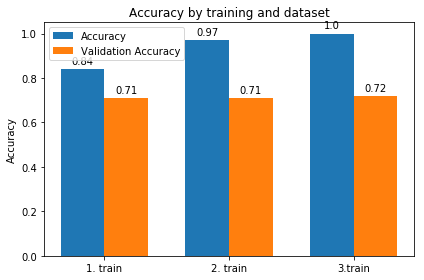

In [20]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


labels = ['1. train', '2. train', '3.train']
accuracy = [a1,a2,a3]
val_accuracy = [v1,v2,v3]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, accuracy, width, label='Accuracy')
rects2 = ax.bar(x + width/2, val_accuracy, width, label='Validation Accuracy')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy by training and dataset')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

This is our result

In [37]:
train_loss = np.concatenate((train1.history['loss'], train2.history['loss'], train3.history['loss']))
val_loss = np.concatenate((train1.history['val_loss'],train2.history['val_loss'],train3.history['val_loss']))
train_acc = np.concatenate((train1.history['acc'], train2.history['acc'], train3.history['acc']))
val_acc = np.concatenate((train1.history['val_acc'],train2.history['val_acc'],train3.history['val_acc']))

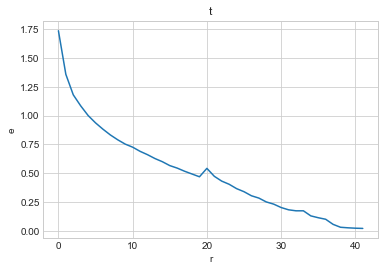

In [43]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(train_loss)
plt.title("Training Loss")
plt.xlabel("Epoche")
plt.ylabel("Loss")

plt.show()

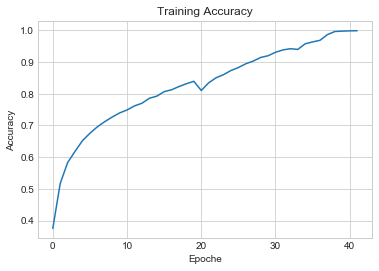

In [46]:
plt.plot(train_acc)
plt.title("Training Accuracy")
plt.xlabel("Epoche")
plt.ylabel("Accuracy")
plt.show()

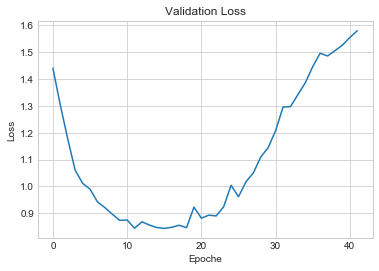

In [45]:
plt.plot(val_loss)
plt.title("Validation Loss")
plt.xlabel("Epoche")
plt.ylabel("Loss")
plt.show()

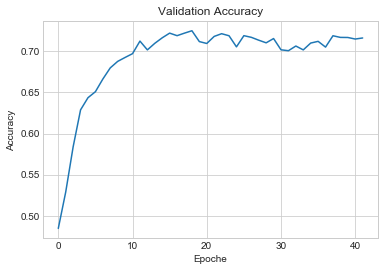

In [44]:
plt.plot(val_acc)
plt.title("Validation Accuracy")
plt.xlabel("Epoche")
plt.ylabel("Accuracy")
plt.show()

Beweis für das Overfitting ist hier, dass der loss von val_acc zunächst sinkt, bei weiterem Training sich aber wieder erhöht.
Nach ca. 15 Epochen ist der Validation loss am Geringsten (ca 0.85) und steigt mit weiteren Trainingsepochen wieder an (bis auf ca. 1.58 nach 40 Epochen).
Wie man an den oben dargestellten Graphen erkennen kann, konnten wir genau das Verhalten beobachten, wie auf der Folie in der Vorlesung besprochen (hier anschließend nochmal dargestellt).

<img src="graph_overfitting.JPG" style="width:400px;height:400px"/>